In [1]:
# library
import nltk
from sklearn import preprocessing
import pandas as pd
import sklearn
import re  
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import os
from sklearn.model_selection import train_test_split
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import graphviz 
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz  
from IPython.display import Image  
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from nltk.stem.porter import PorterStemmer

In [4]:
###########################
## Stemming and Lemming
## Stemming is different to Lemmatization 
## in the approach it uses to produce root 
## forms of words and the word produced.
##
##  !!! Stemming can result in words
##      That are not actually words. 
##    trouble, troubling, troubled, troubles ....
##    all become troubl

##Lemmatization is the process of grouping together 
##the different inflected forms of a word so they can
## be analysed as a single item. Lemmatization is similar
## to stemming but it brings context to the words. So it 
## links words with similar meaning to one word. 

##############################################################
##
##       A Stemmer is a function that truncates and combines
##       words such as hikings and hikers. 
##
###############################################################


STEMMER=PorterStemmer()

# Use NLTK's PorterStemmer in a function
def MY_STEMMER(str_input):   #I like dogs a lot111 !!"
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()   # I, like, dogs, a
    words = [STEMMER.stem(w) for w in words]
    return words

MyVect_STEM=CountVectorizer(input='filename',
                        analyzer = 'word',
                        stop_words='english',
                        ##stop_words=["and", "or", "but"],
                        #token_pattern='(?u)[a-zA-Z]+',
                        #token_pattern=pattern,
                        tokenizer=MY_STEMMER,
                        #strip_accents = 'unicode', 
                        lowercase = True
                        )


MyVect_STEM_Bern=CountVectorizer(input='filename',
                        analyzer = 'word',
                        stop_words='english',
                        ##stop_words=["and", "or", "but"],
                        #token_pattern='(?u)[a-zA-Z]+',
                        #token_pattern=pattern,
                        tokenizer=MY_STEMMER,
                        #strip_accents = 'unicode', 
                        lowercase = True,
                        binary=True    #  0 if the word is not in the doc  and a 1 if it is
                        )



MyVect_IFIDF=TfidfVectorizer(input='filename',
                        analyzer = 'word',
                        stop_words='english',
                        lowercase = True,
                        )

MyVect_IFIDF_STEM=TfidfVectorizer(input='filename',
                        analyzer = 'word',
                        stop_words='english',
                        tokenizer=MY_STEMMER,
                        lowercase = True,
                        )
#


In [5]:


#We will be creating new data frames - one for NB and one for Bern. 
## These are the two new and currently empty DFs

## Notice there are FOUR (4) of these because I have 4 
## vectorizers

FinalDF_STEM=pd.DataFrame()
FinalDF_STEM_Bern=pd.DataFrame()
FinalDF_TFIDF=pd.DataFrame()
FinalDF_TFIDF_STEM=pd.DataFrame()

In [6]:


## You will need to know where things are on your computer.
## This code assumes that it is in the same folder/location
## as the folders DOG and HIKE. It will loop through the files in
## these two folders and will build the list needed to use
## CounterVectorizer. 
## NOTICE: My loop has a path in it. This is for MY computer - not yours!
## You will need to adjust the path.

for name in ["DOG", "HIKE"]:

    builder=name+"DF"    #DOGDF
    #print(builder)
    builderB=name+"DFB"
    
    path="/Users/xingyuchen0810/Downloads/text_mining/Module3/"+name
    
    FileList=[]
    for item in os.listdir(path):
        #print(path+ "\\" + item)
        next1=path+ "/" + item
        FileList.append(next1)  
        print("full list...")
        #print(FileList)
        
        ## Do for all three
        ## MyVect_STEM  and MyVect_IFIDF and MyVect_IFIDF_STEM
        X1=MyVect_STEM.fit_transform(FileList)
        X2=MyVect_IFIDF.fit_transform(FileList)
        X3=MyVect_IFIDF_STEM.fit_transform(FileList)
        XB=MyVect_STEM_Bern.fit_transform(FileList)
        
        
        ColumnNames1=MyVect_STEM.get_feature_names()
        NumFeatures1=len(ColumnNames1)
        ColumnNames2=MyVect_IFIDF.get_feature_names()
        NumFeatures2=len(ColumnNames2)
        ColumnNames3=MyVect_IFIDF_STEM.get_feature_names()
        NumFeatures3=len(ColumnNames3)
        ColumnNamesB=MyVect_STEM_Bern.get_feature_names()
        NumFeatures4=len(ColumnNamesB)
        #print("Column names: ", ColumnNames2)
        #Create a name
        
   
    builderS=pd.DataFrame(X1.toarray(),columns=ColumnNames1)
    builderT=pd.DataFrame(X2.toarray(),columns=ColumnNames2)
    builderTS=pd.DataFrame(X3.toarray(),columns=ColumnNames3)
    builderB=pd.DataFrame(XB.toarray(),columns=ColumnNamesB)
    
    ## Add column
    #print("Adding new column....")
    builderS["Label"]=name
    builderT["Label"]=name
    builderTS["Label"]=name
    builderB["Label"]=name
    #print(builderS)
    
    FinalDF_STEM= FinalDF_STEM.append(builderS)
    FinalDF_STEM_Bern= FinalDF_STEM_Bern.append(builderB)
    FinalDF_TFIDF= FinalDF_TFIDF.append(builderT)
    FinalDF_TFIDF_STEM= FinalDF_TFIDF_STEM.append(builderTS)
   
    #print(FinalDF_STEM.head())



full list...
full list...
full list...
full list...
full list...
full list...
full list...
full list...
full list...
full list...
full list...
full list...
full list...
full list...
full list...
full list...
full list...
full list...
full list...
full list...
full list...
full list...


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warni

In [7]:

## Replace the NaN with 0 because it actually 
## means none in this case
FinalDF_STEM=FinalDF_STEM.fillna(0)
FinalDF_STEM_Bern=FinalDF_STEM_Bern.fillna(0)
FinalDF_TFIDF=FinalDF_TFIDF.fillna(0)
FinalDF_TFIDF_STEM=FinalDF_TFIDF_STEM.fillna(0)


In [8]:


###### REMOVE number columns
## Remove columns with number from this one
##-------------------------------------------------------------------
####### Create a function that removes columns that are/contain nums
##-------------------------------------------------------------------

def RemoveNums(SomeDF):
    #print(SomeDF)
    print("Running Remove Numbers function....\n")
    temp=SomeDF
    MyList=[]
    for col in temp.columns:
        #print(col)
        #Logical1=col.isdigit()  ## is a num
        Logical2=str.isalpha(col) ## this checks for anything
        ## that is not a letter
        if(Logical2==False):# or Logical2==True):
            #print(col)
            MyList.append(str(col))
            #print(MyList)       
    temp.drop(MyList, axis=1, inplace=True)
            #print(temp)
            #return temp
       
    return temp
##########################################################

## Call the function ....
FinalDF_STEM=RemoveNums(FinalDF_STEM)
FinalDF_STEM_Bern=RemoveNums(FinalDF_STEM_Bern)
FinalDF_TFIDF=RemoveNums(FinalDF_TFIDF)
FinalDF_TFIDF_STEM=RemoveNums(FinalDF_TFIDF_STEM)

Running Remove Numbers function....

Running Remove Numbers function....

Running Remove Numbers function....

Running Remove Numbers function....



In [9]:

## Have a look:
## These print statements help you to see where you are
#print(FinalDF_STEM)
## Remove columns that contain "-"  HOW TO....
#cols = [c for c in FinalDF_STEM.columns if "-" in c[:] ]
#FinalDF_STEM=FinalDF_STEM.drop(cols, axis = 1) 
print(FinalDF_STEM)  #1
print(FinalDF_STEM_Bern) #4
print(FinalDF_TFIDF)  #2
print(FinalDF_TFIDF_STEM) #3


    activ  add  adult  allow  alon  anim  anxieti  appreci  attent  bacteri  \
0       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
1       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
2       0  0.0    0.0      0     0   0.0      0.0      1.0     0.0      0.0   
3       0  0.0    0.0      0     0   0.0      0.0      0.0     1.0      0.0   
4       0  0.0    0.0      1     0   0.0      0.0      0.0     0.0      0.0   
5       1  0.0    1.0      0     0   1.0      1.0      0.0     0.0      0.0   
6       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
7       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
8       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      1.0   
9       0  1.0    0.0      0     1   0.0      0.0      0.0     1.0      0.0   
10      0  0.0    0.0      0     0   0.0      0.0      0.0     3.0      0.0   
0       0  0.0    0.0      0     0   0.0      0.0   

In [10]:

##################################################
##
##        Now we have 4 labeled dataframes!
##
##        Let's model them.....
##
######################################################

## Create the testing set - grab a sample from the training set. 
## Be careful. Notice that right now, our train set is sorted by label.
## If your train set is large enough, you can take a random sample.
from sklearn.model_selection import train_test_split
import random as rd
#rd.seed(1234)
TrainDF1, TestDF1 = train_test_split(FinalDF_STEM, test_size=0.3)
print(TrainDF1)
print(TestDF1)
TrainDF2, TestDF2 = train_test_split(FinalDF_TFIDF, test_size=0.3)
TrainDF3, TestDF3 = train_test_split(FinalDF_TFIDF_STEM, test_size=0.3)
TrainDF4, TestDF4 = train_test_split(FinalDF_STEM_Bern, test_size=0.4)
print(TestDF4)
### OK - at this point we have Train and Test data for the text data
## in DOG and HIKE. 
## Of course, this can be updated to work from sentiment (like POS and NEG)
## and can be update for multiple folders or one folder..


    activ  add  adult  allow  alon  anim  anxieti  appreci  attent  bacteri  \
9       0  1.0    0.0      0     1   0.0      0.0      0.0     1.0      0.0   
4       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
8       0  0.0    0.0      0     1   0.0      0.0      0.0     0.0      0.0   
0       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
8       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      1.0   
5       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
7       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
1       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
0       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
6       0  0.0    0.0      0     1   0.0      0.0      0.0     0.0      0.0   
5       1  0.0    1.0      0     0   1.0      1.0      0.0     0.0      0.0   
3       0  0.0    0.0      0     0   0.0      0.0   

In [11]:



###############################################
## For all FOUR DFs - separate LABELS
#################################################
## IMPORTANT - YOU CANNOT LEAVE LABELS ON THE TEST SET
## Save labels
### TEST ---------------------
Test1Labels=TestDF1["Label"]
print(Test1Labels)
Test2Labels=TestDF2["Label"]
Test3Labels=TestDF3["Label"]
Test4Labels=TestDF4["Label"]
print(Test2Labels)
## remove labels
TestDF1 = TestDF1.drop(["Label"], axis=1)
TestDF2 = TestDF2.drop(["Label"], axis=1)
TestDF3 = TestDF3.drop(["Label"], axis=1)
TestDF4 = TestDF4.drop(["Label"], axis=1)
print(TestDF1)

## TRAIN ----------------------------
Train1Labels=TrainDF1["Label"]
Train2Labels=TrainDF2["Label"]
Train3Labels=TrainDF3["Label"]
Train4Labels=TrainDF4["Label"]
print(Train3Labels)
## remove labels
TrainDF1 = TrainDF1.drop(["Label"], axis=1)
TrainDF2 = TrainDF2.drop(["Label"], axis=1)
TrainDF3 = TrainDF3.drop(["Label"], axis=1)
TrainDF4 = TrainDF4.drop(["Label"], axis=1)
print(TrainDF3)


3     DOG
2    HIKE
6     DOG
7    HIKE
9    HIKE
2     DOG
1     DOG
Name: Label, dtype: object
7    HIKE
7     DOG
4    HIKE
4     DOG
0    HIKE
9    HIKE
6     DOG
Name: Label, dtype: object
   activ  add  adult  allow  alon  anim  anxieti  appreci  attent  bacteri  \
3      0  0.0    0.0      0     0   0.0      0.0      0.0     1.0      0.0   
2      3  0.0    0.0      1     0   0.0      0.0      0.0     0.0      0.0   
6      0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
7      0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
9      0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
2      0  0.0    0.0      0     0   0.0      0.0      1.0     0.0      0.0   
1      0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   

   ...  usual  vari  veri  water  weather  weight  wild  wildlif  winter  \
3  ...    0.0   0.0   0.0    0.0      0.0     0.0   0.0      0.0     0.0   
2  ...    1.0   1.0   0.0    

In [12]:


####################################################################
########################### Naive Bayes ############################
####################################################################
from sklearn.naive_bayes import MultinomialNB
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.fit
#Create the modeler
MyModelNB= MultinomialNB()



## Run on all three Dfs.................
NB1=MyModelNB.fit(TrainDF1, Train1Labels)
Prediction1 = MyModelNB.predict(TestDF1)
print(np.round(MyModelNB.predict_proba(TestDF1),2))

NB2=MyModelNB.fit(TrainDF2, Train2Labels)
Prediction2 = MyModelNB.predict(TestDF2)
print(np.round(MyModelNB.predict_proba(TestDF2),2))

NB3=MyModelNB.fit(TrainDF3, Train3Labels)
Prediction3 = MyModelNB.predict(TestDF3)
print(np.round(MyModelNB.predict_proba(TestDF3),2))

NB4=MyModelNB.fit(TrainDF4, Train4Labels)
Prediction4 = MyModelNB.predict(TestDF4)
print(np.round(MyModelNB.predict_proba(TestDF4),2))


[[1.   0.  ]
 [0.03 0.97]
 [1.   0.  ]
 [0.99 0.01]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]]
[[0.7  0.3 ]
 [0.57 0.43]
 [0.37 0.63]
 [0.56 0.44]
 [0.51 0.49]
 [0.37 0.63]
 [0.67 0.33]]
[[0.53 0.47]
 [0.66 0.34]
 [0.3  0.7 ]
 [0.63 0.37]
 [0.42 0.58]
 [0.75 0.25]
 [0.65 0.35]]
[[0.04 0.96]
 [0.8  0.2 ]
 [0.03 0.97]
 [0.91 0.09]
 [0.99 0.01]
 [0.   1.  ]
 [0.99 0.01]
 [0.95 0.05]
 [0.95 0.05]]


In [13]:





print("\nThe prediction from NB is:")
print(Prediction1)
print("\nThe actual labels are:")
print(Test1Labels)

print("\nThe prediction from NB is:")
print(Prediction2)
print("\nThe actual labels are:")
print(Test2Labels)

print("\nThe prediction from NB is:")
print(Prediction3)
print("\nThe actual labels are:")
print(Test3Labels)

print("\nThe prediction from NB is:")
print(Prediction4)
print("\nThe actual labels are:")
print(Test4Labels)

## confusion matrix
from sklearn.metrics import confusion_matrix
## The confusion matrix is square and is labels X labels
## We ahve two labels, so ours will be 2X2
#The matrix shows
## rows are the true labels
## columns are predicted
## it is al[habetical
## The numbers are how many 
cnf_matrix1 = confusion_matrix(Test1Labels, Prediction1)
print("\nThe confusion matrix is:")
print(cnf_matrix1)

cnf_matrix2 = confusion_matrix(Test2Labels, Prediction2)
print("\nThe confusion matrix is:")
print(cnf_matrix2)

cnf_matrix3 = confusion_matrix(Test3Labels, Prediction3)
print("\nThe confusion matrix is:")
print(cnf_matrix3)

cnf_matrix4 = confusion_matrix(Test4Labels, Prediction4)
print("\nThe confusion matrix is:")
print(cnf_matrix4)



The prediction from NB is:
['DOG' 'HIKE' 'DOG' 'DOG' 'HIKE' 'DOG' 'DOG']

The actual labels are:
3     DOG
2    HIKE
6     DOG
7    HIKE
9    HIKE
2     DOG
1     DOG
Name: Label, dtype: object

The prediction from NB is:
['DOG' 'DOG' 'HIKE' 'DOG' 'DOG' 'HIKE' 'DOG']

The actual labels are:
7    HIKE
7     DOG
4    HIKE
4     DOG
0    HIKE
9    HIKE
6     DOG
Name: Label, dtype: object

The prediction from NB is:
['DOG' 'DOG' 'HIKE' 'DOG' 'HIKE' 'DOG' 'DOG']

The actual labels are:
2    HIKE
7    HIKE
8    HIKE
9     DOG
5    HIKE
3     DOG
2     DOG
Name: Label, dtype: object

The prediction from NB is:
['HIKE' 'DOG' 'HIKE' 'DOG' 'DOG' 'HIKE' 'DOG' 'DOG' 'DOG']

The actual labels are:
5     HIKE
2     HIKE
1     HIKE
2      DOG
10     DOG
8     HIKE
5      DOG
1      DOG
3      DOG
Name: Label, dtype: object

The confusion matrix is:
[[4 0]
 [1 2]]

The confusion matrix is:
[[3 0]
 [2 2]]

The confusion matrix is:
[[3 0]
 [2 2]]

The confusion matrix is:
[[5 0]
 [1 3]]


In [14]:


#######################################################
### Bernoulli #########################################
#######################################################


from sklearn.naive_bayes import BernoulliNB
BernModel = BernoulliNB()
BernModel.fit(TrainDF4, Train4Labels)
##BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
print("\nBernoulli prediction:\n")
Prediction=BernModel.predict(TestDF4)
print("\nActual:")
print(Test4Labels)
print("\The prediction\n")
print(Prediction)
#
bn_matrix = confusion_matrix(Test4Labels, Prediction)
print("\nThe confusion matrix is:")
print(bn_matrix)



Bernoulli prediction:


Actual:
5     HIKE
2     HIKE
1     HIKE
2      DOG
10     DOG
8     HIKE
5      DOG
1      DOG
3      DOG
Name: Label, dtype: object
\The prediction

['HIKE' 'HIKE' 'HIKE' 'DOG' 'DOG' 'HIKE' 'DOG' 'DOG' 'DOG']

The confusion matrix is:
[[5 0]
 [0 4]]


In [15]:


#########################################################
#############    Decision Trees   #######################
#########################################################

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
MyDT=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            min_impurity_split=None, 
                            class_weight=None)


In [16]:
TrainDF1

,activ,add,adult,allow,alon,anim,anxieti,appreci,attent,bacteri,...,usual,vari,veri,water,weather,weight,wild,wildlif,winter,workout
9,0,1.0,0.0,0,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
8,0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


    activ  add  adult  allow  alon  anim  anxieti  appreci  attent  bacteri  \
9       0  1.0    0.0      0     1   0.0      0.0      0.0     1.0      0.0   
4       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
8       0  0.0    0.0      0     1   0.0      0.0      0.0     0.0      0.0   
0       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
8       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      1.0   
5       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
7       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
1       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
0       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
6       0  0.0    0.0      0     1   0.0      0.0      0.0     0.0      0.0   
5       1  0.0    1.0      0     0   1.0      1.0      0.0     0.0      0.0   
3       0  0.0    0.0      0     0   0.0      0.0   

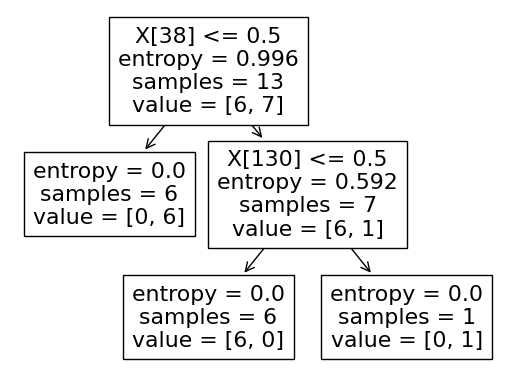

In [17]:

## ------------------------------
## This for loop will fit and predict Decision Trees for 
## all 4 of the dataframes. Notice that this uses dynamic variables
## and eval
##--------------------------
##
print(TrainDF1)



for i in [1,2,3,4]:
    temp1=str("TrainDF"+str(i))   ##  TrainDF1
    temp2=str("Train"+str(i)+"Labels")  #Train1Labels
    temp3=str("TestDF"+str(i))  #TestDF1
    temp4=str("Test"+str(i)+"Labels") # Test1Labels
    
    ## perform DT
    #MyDT.fit(TrainDF1, Train1Labels)
    MyDT.fit(eval(temp1), eval(temp2))
    ## plot the tree
    tree.plot_tree(MyDT)
    plt.savefig(temp1)
    feature_names=eval(str(temp1+".columns"))
    dot_data = tree.export_graphviz(MyDT, out_file=None,
                    ## The following creates TrainDF.columns for each
                    ## which are the feature names.
                      feature_names=eval(str(temp1+".columns")),  
                      #class_names=MyDT.class_names,  
                      filled=True, rounded=True,  
                      special_characters=True)                                    
    graph = graphviz.Source(dot_data) 
    ## Create dynamic graph name
    tempname=str("Graph" + str(i))
    graph.render(tempname) 
    ## Show the predictions from the DT on the test set
    print("\nActual for DataFrame: ", i, "\n")
    print(eval(temp2))
    print("Prediction\n")
    DT_pred=MyDT.predict(eval(temp3))
    print(DT_pred)
    ## Show the confusion matrix
    bn_matrix = confusion_matrix(eval(temp4), DT_pred)
    print("\nThe confusion matrix is:")
    print(bn_matrix)
    FeatureImp=MyDT.feature_importances_   
    indices = np.argsort(FeatureImp)[::-1]
    ## print out the important features.....
    for f in range(TrainDF4.shape[1]):
        if FeatureImp[indices[f]] > 0:
            print("%d. feature %d (%f)" % (f + 1, indices[f], FeatureImp[indices[f]]))
            print ("feature name: ", feature_names[indices[f]])

## FYI for small datasets you can zip features....
## print(dict(zip(iris_pd.columns, clf.feature_importances_)))


9      DOG
4     HIKE
8     HIKE
0      DOG
8      DOG
5     HIKE
7      DOG
1     HIKE
0     HIKE
6     HIKE
5      DOG
3     HIKE
10    HIKE
10     DOG
4      DOG
Name: Label, dtype: object
9     1
4     0
8     0
0     1
8     1
5     0
7     1
1     0
0     0
6     0
5     1
3     0
10    0
10    1
4     1
Name: Label, dtype: int64
-1
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
9      DOG
4     HIKE
8     HIKE
0      DOG
8      DOG
5     HIKE
7      DOG
1     HIKE
0     HIKE
6     HIKE
5      DOG
3     HIKE
10    HIKE
10     DOG
4      DOG
Name: Label, dtype: object
9     1
4     0
8     0
0     1
8     1
5     0
7     1
1     0
0     0
6     0
5     1
3     0
10    0
10    1
4     1
Name: Label, dtype: int64
-1
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
9      DOG
4     HIKE
8     HIKE
0      DOG
8      DOG
5     HIKE
7      DOG
1

/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_19842/4019463642.py:56: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=30, label=oldy,edgecolor='black',
/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_19842/4019463642.py:56: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=30, label=oldy,edgecolor='black',
/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_19842/4019463642.py:56: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=30, label=oldy,edgecolor='black',
/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_19842/4019463642.py:56: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=30, label=oldy,edgecolor='blac

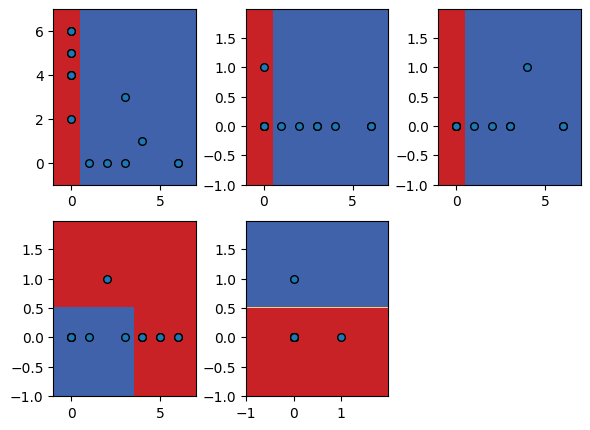

In [18]:


#####################################################
##  Visualize Decision Trees plotting paired surfaces
##
####################################################
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

f1=TrainDF1.columns.get_loc("dog") 
f2=TrainDF1.columns.get_loc("hike") 
f3=TrainDF1.columns.get_loc("workout") 
f4=TrainDF1.columns.get_loc("happi") 


n_classes =2
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[f1, f2], [f1, f3], [f1, f4],
                                [f2,f3], [f3, f4]]):
    #print(TrainDF1.iloc[:,pair])
    X = TrainDF1.iloc[:, pair]
    ## Because we are plotting, using our GOD and HIKE labels will not work
    ## we need to change them to 0 and 1
    y = Train1Labels
    print(y)
    oldy=y
    #print(type(y))
    y=y.replace("DOG", 1)
    y=y.replace("HIKE", 0)
    
    print(y)
    # Train
    DT = DecisionTreeClassifier().fit(X, y)
    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    print(x_min)
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
   
    xx, yy = np.meshgrid(np.arange(x_min, x_max,plot_step),
                         np.arange(y_min, y_max,plot_step))
    
    #print(yy)
    
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
#
    Z = DT.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    print(Z)
    
    
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
       
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=30, label=oldy,edgecolor='black', 
                    #c=color, s=15)
                    #label=y[i],
                    cmap=plt.cm.RdYlBu)
###---------------------------end for loop ----------------------------------
#plt.suptitle("Decision surface of a decision tree using paired features")
#plt.legend(loc='lower right', borderpad=0, handletextpad=0)
#plt.axis("tight")
#
#plt.figure()


The confusion matrix is:
[[4 0]
 [1 2]]


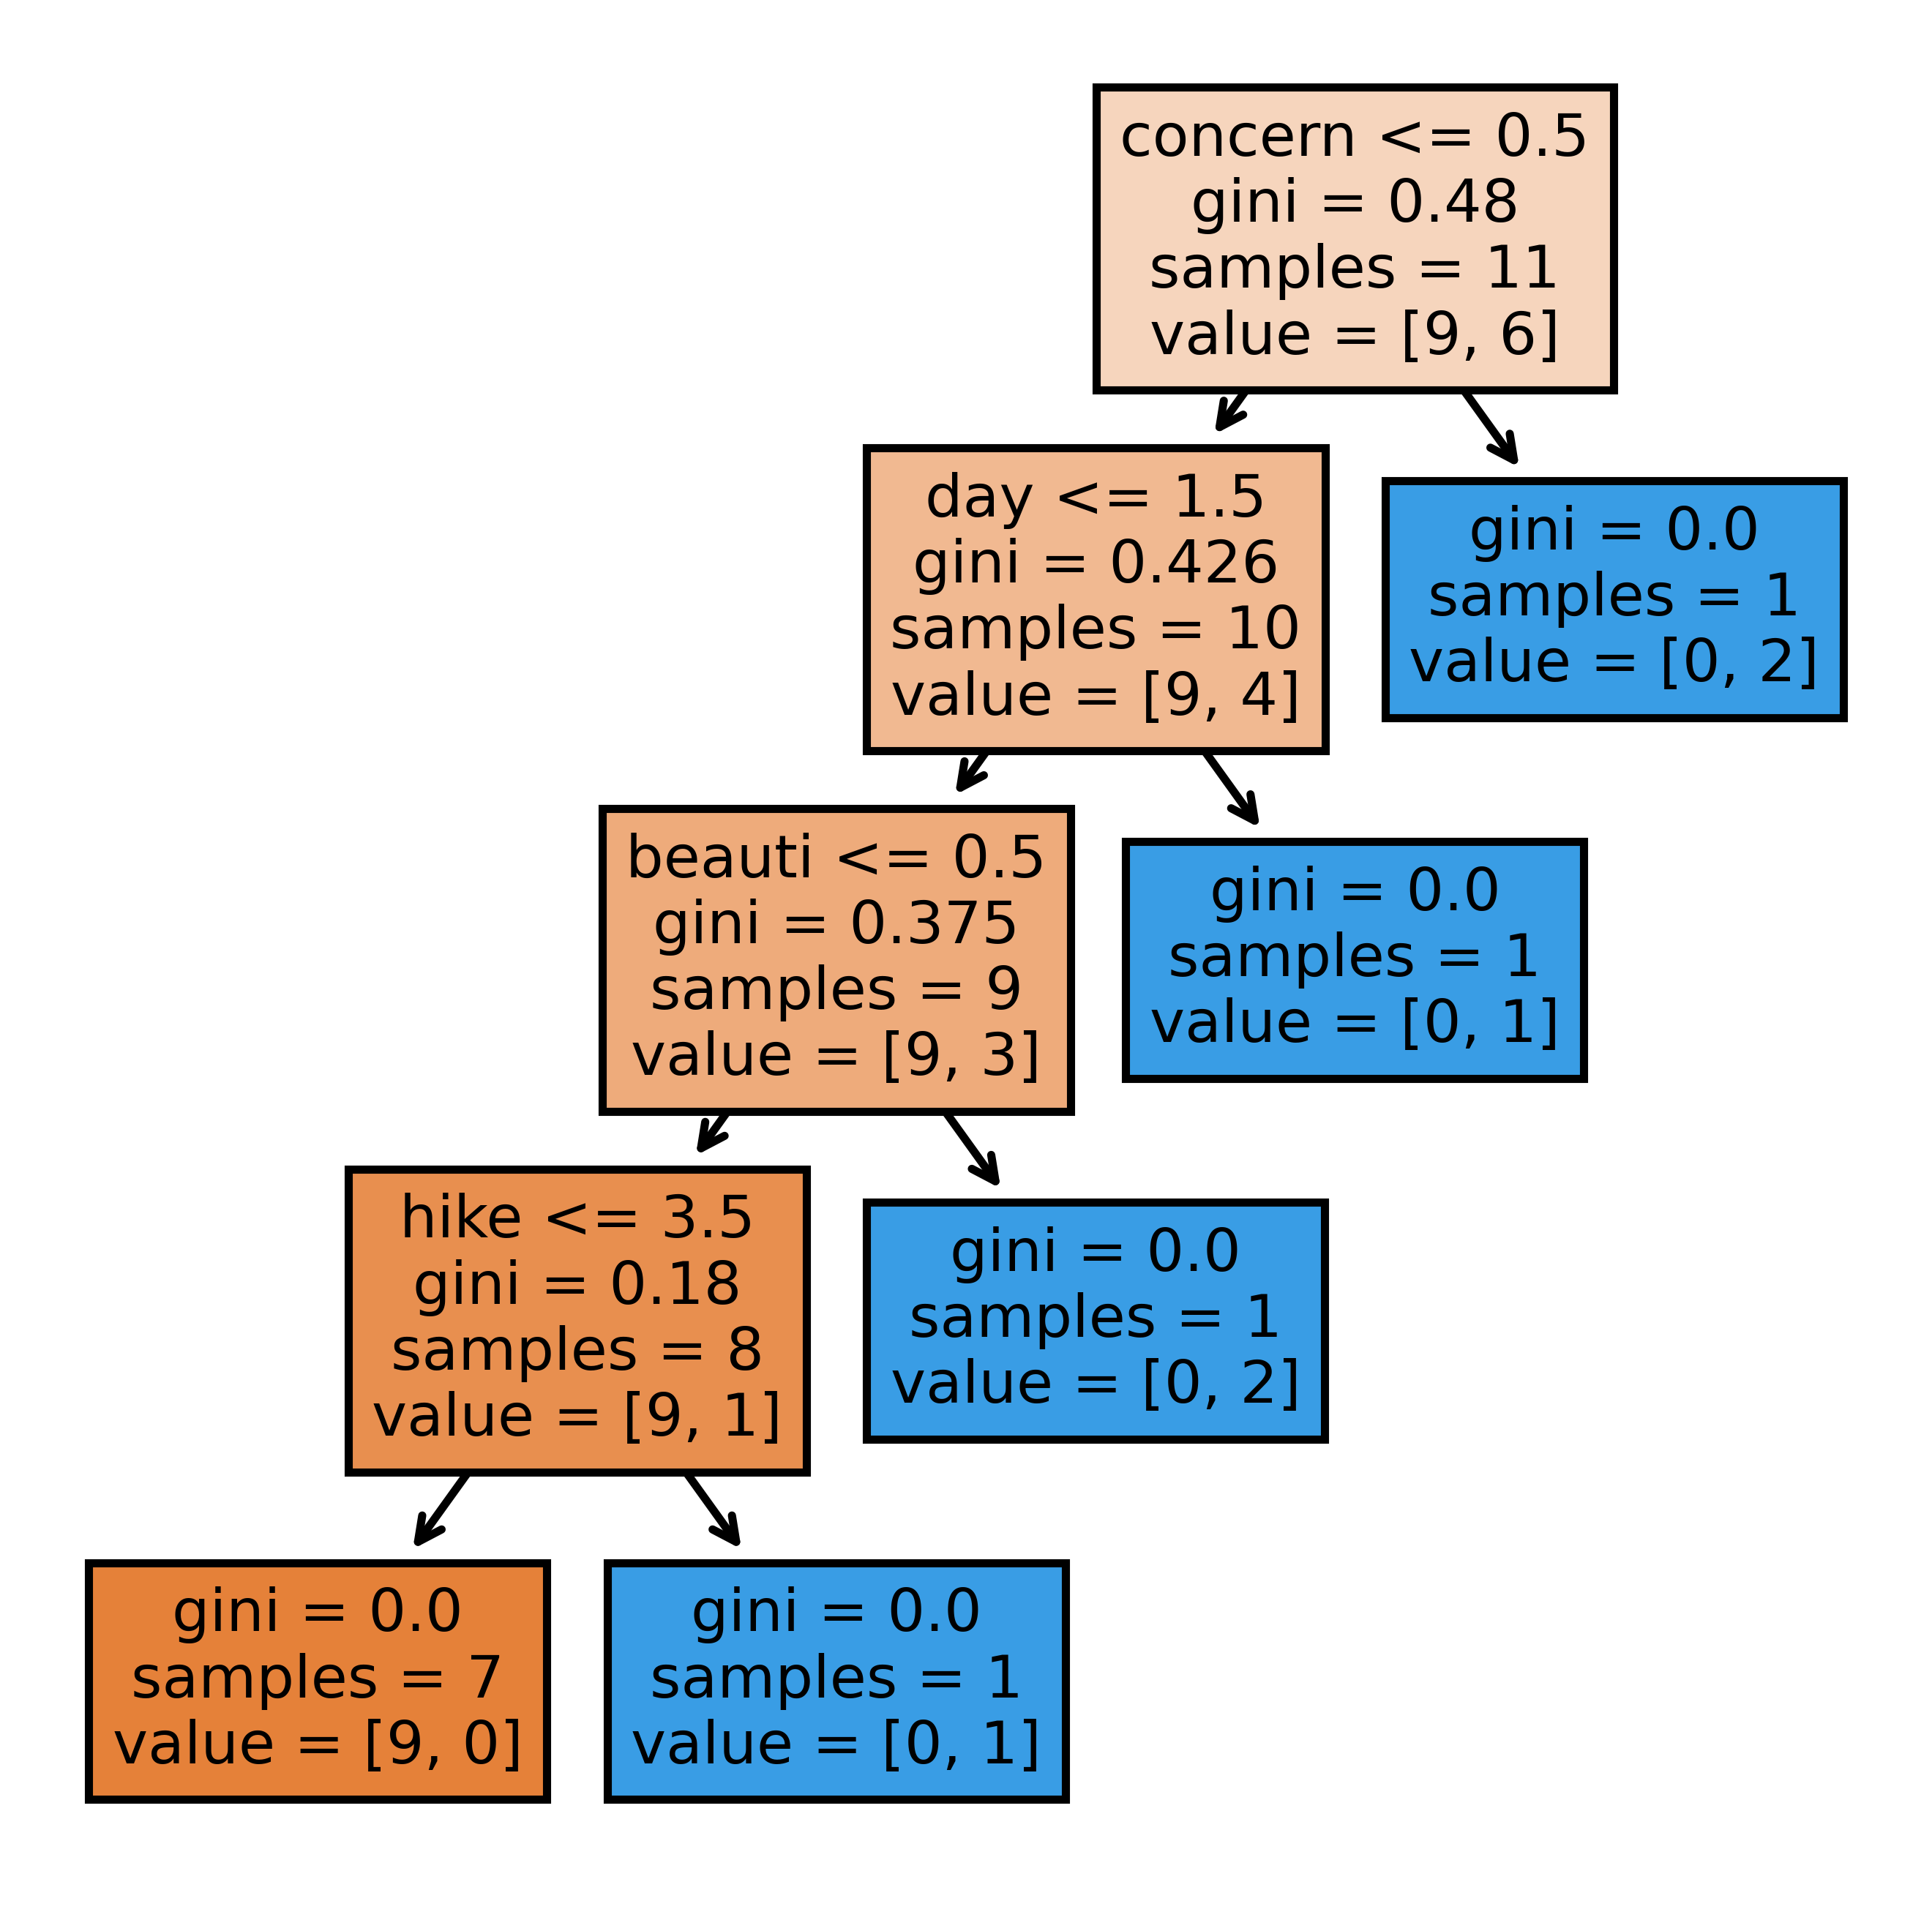

In [19]:

#########################################################
##
##                 Random Forest for Text Data
##
#################################################################
RF = RandomForestClassifier()
RF.fit(TrainDF1, Train1Labels)
RF_pred=RF.predict(TestDF1)

bn_matrix_RF_text = confusion_matrix(Test1Labels, RF_pred)
print("\nThe confusion matrix is:")
print(bn_matrix_RF_text)

################# VIS RF---------------------------------
## FEATURE NAMES...................
FeaturesT=TrainDF1.columns
#Targets=StudentTestLabels_Num

figT, axesT = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)

tree.plot_tree(RF.estimators_[0],
               feature_names = FeaturesT, 
               #class_names=Targets,
               filled = True)

##save it
figT.savefig('RF_Tree_Text')  ## creates png


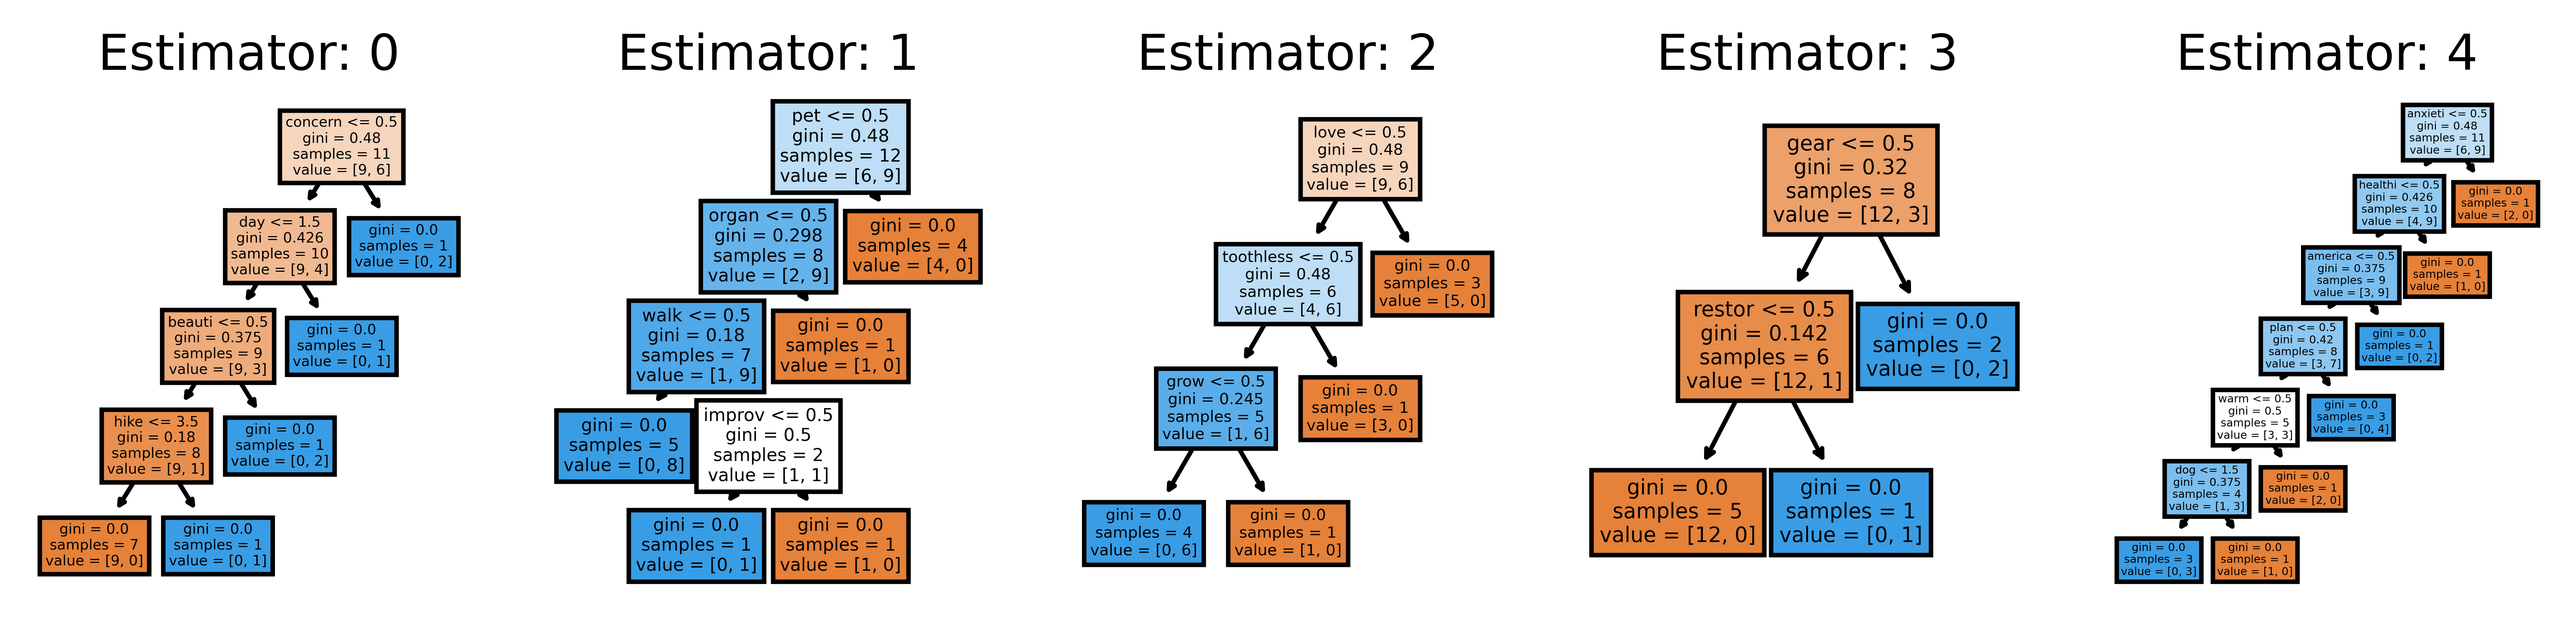

In [20]:
#####------------------> View estimator Trees in RF

figT2, axesT2 = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)

for index in range(0, 5):
    tree.plot_tree(RF.estimators_[index],
                   feature_names = FeaturesT, 
                   filled = True,
                   ax = axesT2[index])

    axesT2[index].set_title('Estimator: ' + str(index), fontsize = 11)
## Save it
figT2.savefig('FIVEtrees_RF.png')

1. feature 38 (0.13)
feature name:  dog
2. feature 60 (0.08)
feature name:  hike
3. feature 92 (0.05)
feature name:  pet
4. feature 161 (0.03)
feature name:  gear
5. feature 54 (0.02)
feature name:  great
6. feature 78 (0.02)
feature name:  love
7. feature 209 (0.02)
feature name:  tell
8. feature 45 (0.02)
feature name:  exercis
9. feature 70 (0.02)
feature name:  like
10. feature 168 (0.02)
feature name:  includ
11. feature 27 (0.01)
feature name:  companion
12. feature 93 (0.01)
feature name:  play
13. feature 212 (0.01)
feature name:  trail
14. feature 32 (0.01)
feature name:  deaf
15. feature 82 (0.01)
feature name:  need
16. feature 76 (0.01)
feature name:  longer
17. feature 186 (0.01)
feature name:  plan
18. feature 118 (0.01)
feature name:  toothless
19. feature 65 (0.01)
feature name:  increas


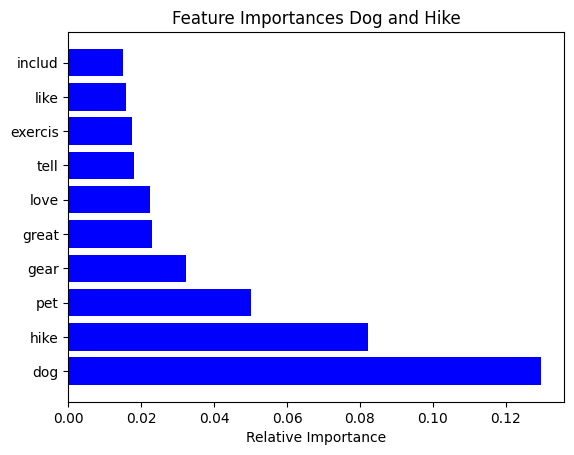

In [21]:


#################-------------------------->
## Feature importance in RF
##-----------------------------------------
## Recall that FeaturesT are the columns names - the words in this case.
######
FeatureImpRF=RF.feature_importances_   
indicesRF = np.argsort(FeatureImpRF)[::-1]
## print out the important features.....
for f2 in range(TrainDF1.shape[1]):   ##TrainDF1.shape[1] is number of columns
    if FeatureImpRF[indicesRF[f2]] >= 0.01:
        print("%d. feature %d (%.2f)" % (f2 + 1, indicesRF[f2], FeatureImpRF[indicesRF[f2]]))
        print ("feature name: ", FeaturesT[indicesRF[f2]])
        

## PLOT THE TOP 10 FEATURES...........................
top_ten_arg = indicesRF[:10]
#print(top_ten_arg)
plt.title('Feature Importances Dog and Hike')
plt.barh(range(len(top_ten_arg)), FeatureImpRF[top_ten_arg], color='b', align='center')
plt.yticks(range(len(top_ten_arg)), [FeaturesT[i] for i in top_ten_arg])
plt.xlabel('Relative Importance')
plt.show()

In [22]:



#####################################################################
##
##             NN
##
#########################################################################

from sklearn.neural_network import MLPClassifier

MyNN = MLPClassifier(solver='lbfgs', 
                    #solver='adam',
                    #solver='sgd',
                     alpha=1,  
                     
                   hidden_layer_sizes=(1, 2), random_state=1)

MyNN.fit(TrainDF1, Train1Labels)
NNPrediction = MyNN.predict(TestDF1)
print("confusion matrix for NN\n")
NN_matrix = confusion_matrix(Test1Labels, NNPrediction)
print(NN_matrix)

confusion matrix for NN

[[0 4]
 [0 3]]


In [23]:


#############################################
###########  SVM ############################
#############################################
#from sklearn.svm import LinearSVC
SVM_Model=LinearSVC(C=1)

SVM_Model.fit(TrainDF1, Train1Labels)

#print("SVM prediction:\n", SVM_Model.predict(TestDF1))
#print("Actual:")
#print(Test1Labels)

SVM_matrix = confusion_matrix(Test1Labels, SVM_Model.predict(TestDF1))
print("\nThe confusion matrix is:")
print(SVM_matrix)
print("\n\n")




The confusion matrix is:
[[4 0]
 [1 2]]





In [24]:


#############################################
###########  SVM ############################
#############################################
#from sklearn.svm import LinearSVC
### 
### SVMs do not run on qualitative data.
### ALWAYS remove the Labels from the Test and Train data
###
### Here is what we have from above:
## TrainDF_nolabels, TrainLabels
### TestDF, TestLabels


##############################
## Rather than creating copies of everything
## 
### !!!!!!!!!!!!!!!!!
##  You can set the variables: TRAIN, TRAIN_Labels
##                            TEST and TEST_Labels
## to whatever you wish
######################################################

TRAIN= TrainDF1   ## As noted above - this can also be TrainDF2, etc.
print(TRAIN)
TRAIN_Labels= Train1Labels
print(TRAIN_Labels)
TEST= TestDF1
TEST_Labels= Test1Labels


SVM_Model1=LinearSVC(C=1)
SVM_Model1.fit(TRAIN, TRAIN_Labels)

#print("SVM prediction:\n", SVM_Model1.predict(TEST))
#print("Actual:")
#print(TEST_Labels)

SVM_matrix = confusion_matrix(TEST_Labels, SVM_Model1.predict(TEST))
print("\nThe confusion matrix is:")
print(SVM_matrix)
print("\n\n")

    activ  add  adult  allow  alon  anim  anxieti  appreci  attent  bacteri  \
9       0  1.0    0.0      0     1   0.0      0.0      0.0     1.0      0.0   
4       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
8       0  0.0    0.0      0     1   0.0      0.0      0.0     0.0      0.0   
0       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
8       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      1.0   
5       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
7       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
1       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
0       0  0.0    0.0      0     0   0.0      0.0      0.0     0.0      0.0   
6       0  0.0    0.0      0     1   0.0      0.0      0.0     0.0      0.0   
5       1  0.0    1.0      0     0   1.0      1.0      0.0     0.0      0.0   
3       0  0.0    0.0      0     0   0.0      0.0   

In [25]:


#--------------other kernels
## RBF------------------------------------------
##------------------------------------------------------
SVM_Model2=sklearn.svm.SVC(C=1, kernel='rbf', 
                           verbose=True, gamma="auto")
SVM_Model2.fit(TRAIN, TRAIN_Labels)

#print("SVM prediction:\n", SVM_Model2.predict(TEST))
#print("Actual:")
#print(TEST_Labels)
print("RBF  :\n")
SVM_matrix2 = confusion_matrix(TEST_Labels, SVM_Model2.predict(TEST))
print("\nThe confusion matrix is:")
print(SVM_matrix2)
print("\n\n")


[LibSVM]*
optimization finished, #iter = 11
obj = -8.229698, rho = 0.061994
nSV = 15, nBSV = 11
Total nSV = 15
RBF  :


The confusion matrix is:
[[4 0]
 [0 3]]





In [26]:


##-----------------------------------------
## POLY
##_--------------------------------------------------
SVM_Model3=sklearn.svm.SVC(C=100, kernel='poly',degree=3,
                           gamma="auto", verbose=True)

#print(SVM_Model3)
SVM_Model3.fit(TRAIN, TRAIN_Labels)

#print("SVM prediction:\n", SVM_Model3.predict(TEST))
#print("Actual:")
#print(TEST_Labels)
print("POLY Degree 2:\n")
SVM_matrix3 = confusion_matrix(TEST_Labels, SVM_Model3.predict(TEST))
print("\nThe confusion matrix is:")
print(SVM_matrix3)
print("\n\n")


[LibSVM]POLY Degree 2:

*
optimization finished, #iter = 13
obj = -806.449431, rho = 0.260257
nSV = 13, nBSV = 8
Total nSV = 13

The confusion matrix is:
[[2 2]
 [0 3]]





[134 159 164 168 220 161 212 182 148  60]
[ 38  70  92  54  45  27  65 101  80  16]


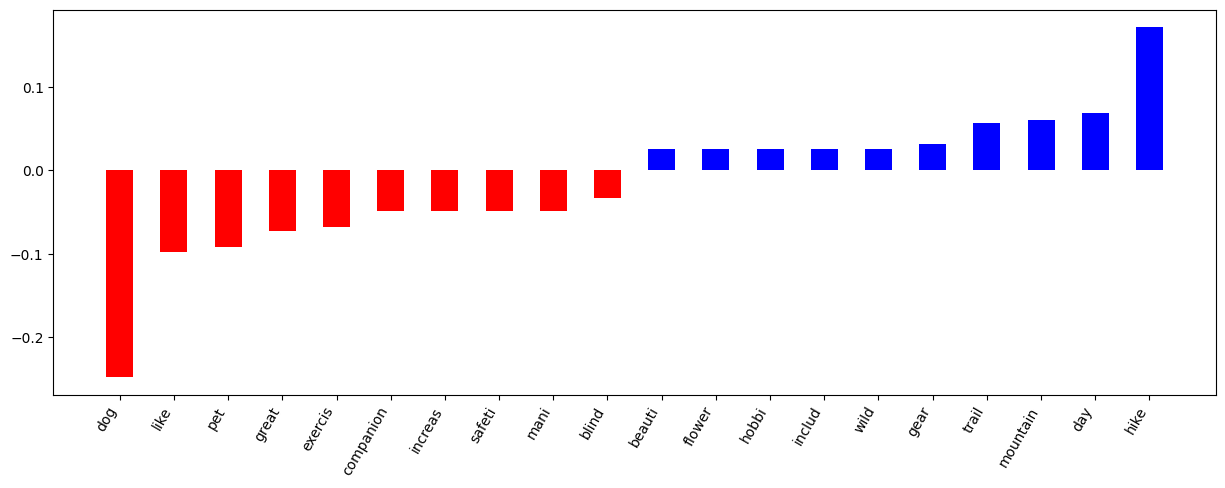

In [27]:

###################################################
##
##   Visualizing the top features
##   Then Visualizing the margin with the top 2 in 2D
##
##########################################################

import matplotlib.pyplot as plt
## Credit: https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
## Define a function to visualize the TOP words (variables)
def plot_coefficients(MODEL=SVM_Model, COLNAMES=TrainDF1.columns, top_features=10):
    ## Model if SVM MUST be SVC, RE: SVM_Model=LinearSVC(C=10)
    coef = MODEL.coef_.ravel()
    top_positive_coefficients = np.argsort(coef,axis=0)[-top_features:]
    print(top_positive_coefficients)
    top_negative_coefficients = np.argsort(coef,axis=0)[:top_features]
    print(top_negative_coefficients)
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[top_coefficients]]
    plt.bar(  x=  np.arange(2 * top_features)  , height=coef[top_coefficients], width=.5,  color=colors)
    feature_names = np.array(COLNAMES)
    plt.xticks(np.arange(0, (2*top_features)), feature_names[top_coefficients], rotation=60, ha="right")
    plt.show()
    

plot_coefficients()



[[6 0]
 [0 6]
 [0 6]
 [3 3]
 [4 1]
 [0 4]
 [2 0]
 [0 4]
 [0 5]
 [0 5]
 [1 0]
 [0 2]
 [0 4]
 [6 0]
 [3 0]]
9      DOG
4     HIKE
8     HIKE
0      DOG
8      DOG
5     HIKE
7      DOG
1     HIKE
0     HIKE
6     HIKE
5      DOG
3     HIKE
10    HIKE
10     DOG
4      DOG
Name: Label, dtype: object
[0 1 1 0 0 1 0 1 1 1 0 1 1 0 0]


(-0.5, 10.5, -1.5675142880073998, 17.066168320525975)

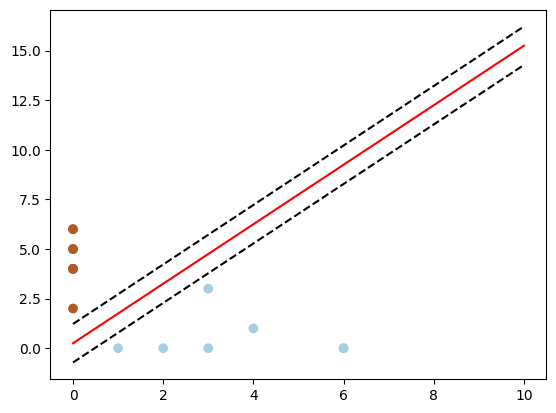

In [28]:



#########################################################
##  Using the top 2 features from above
## Let's look at the margin of the SVM
##################################################################
from sklearn.svm import SVC
X = np.array([TRAIN["dog"], TRAIN["hike"]])
X = X.transpose()
print(X)
#The classes of the training data
y = TRAIN_Labels
print(y)
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y=lb.fit_transform(y)

y = np.array(y)
y = y.ravel()  ## to make it the right 1D array type

print(y)


## Here - we need to make y into 0 or 1 so it will plot

#TRAIN
#Define the model with SVC
# Fit SVM with training data
clf = SVC(C=1, kernel="linear")
clf.fit(X, y) 


margin = 2 / np.sqrt(np.sum(clf.coef_ ** 2))

# get the separating hyperplane
#The weights vector w
w = clf.coef_[0]
#print("The weight vector ", w)

#The slope of the SVM sep line
a = -w[0] / w[1]
#print("The slope of the SVM sep line is ", a)

#Create a variable xx that are values between 4 and 8
xx = np.linspace(0, 10)

#Equation of sep line in 2D
# x1  = - b/w1  - (w0/w1 )(x0)
## Note that clf_intercept_[0] is "b"
## Note that a  = -w0/w1 and xx are a bunch of x values
## This is the y values for the main sep line
yy = a * xx - (clf.intercept_[0]) / w[1]

##These plot the two parellel margin lines
# plot the parallel lines to the separating hyperplane 
#that pass through the support vectors and note the margin
#margin = 2 / np.sqrt(np.sum(clf.coef_ ** 2))
#translate the location of the center sep line by
# adding or subtracting a fraaction of the margin 
yy_down = yy + .5*margin
yy_up = yy - .5*margin

# plot the line, the points, and the nearest vectors to the plane
#plt.figure(fignum, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, 'r-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=10,
                facecolors='none', zorder=5)
#cmap is the color map
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=5, cmap=plt.cm.Paired)

plt.axis('tight')
